## Exploratory Notebook

This notebook performs a preliminary exploration of the Galaxy10 DECaLS dataset: https://astronn.readthedocs.io/en/latest/galaxy10.html

"Galaxy10 DECaLS is a dataset contains 17736 256x256 pixels colored galaxy images (g, r and z band) separated in 10 classes. Galaxy10_DECals.h5 have columns images with shape (17736, 256, 256, 3), ans, ra, dec, redshift and pxscale in unit of arcsecond per pixel."

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import collections

class_map = {
    0: "Disturbed",
    1: "Merging",
    2: "Round Smooth",
    3: "In-between Round Smooth",
    4: "Cigar Shaped Smooth",
    5: "Barred Spiral",
    6: "Unbarred Tight Spiral",
    7: "Unbarred Loose Spiral",
    8: "Edge-on  without Bulge",
    9: "Edge-on  with Bulge"
}

In [2]:
# Open the HDF5 file and load images and labels
file_path = 'data/Galaxy10_DECals.h5'
with h5py.File(file_path, 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

### Dataset Exploration & Statistics

In [13]:
print("Images shape:", images.shape)   # Expected: (17736, 256, 256, 3)
print("Labels shape:", labels.shape)     # Expected: (17736,)

# Convert to PyTorch tensors (float32 for images)
images_tensor = torch.tensor(images, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)  # use long for class indices

# Print dtype information to ensure correct conversion
print("Images dtype:", images_tensor.dtype)
print("Labels dtype:", labels_tensor.dtype)

Images shape: (17736, 256, 256, 3)
Labels shape: (17736,)
Images dtype: torch.float32
Labels dtype: torch.int64


In [14]:
print("Min pixel value:", images_tensor.min().item())
print("Max pixel value:", images_tensor.max().item())

Min pixel value: 0.0
Max pixel value: 255.0


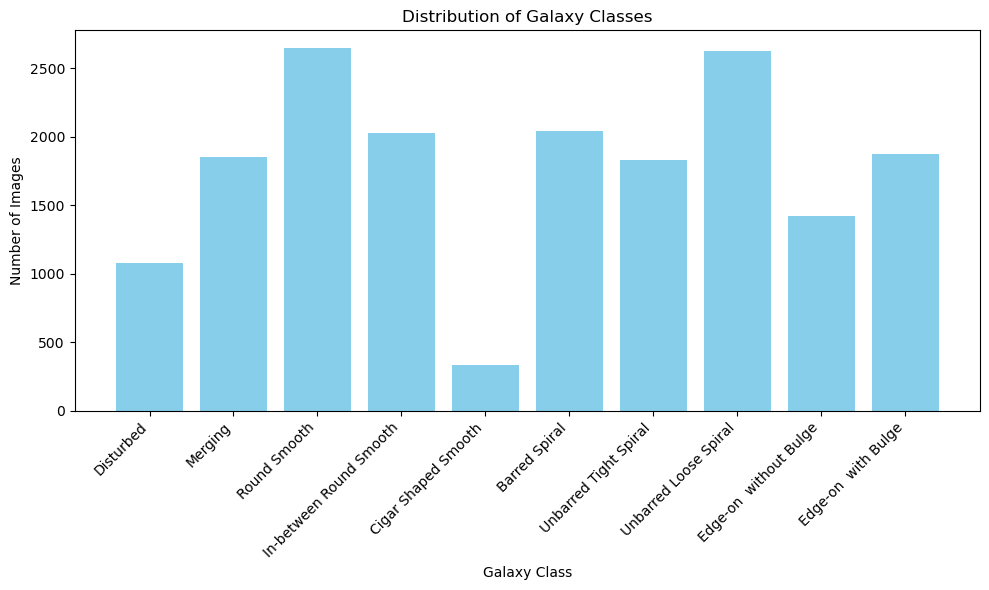

In [16]:
# Convert tensor to a list or numpy array for counting 
labels_list = labels_tensor.numpy().tolist() 
label_counts = collections.Counter(labels_list)

# Instead of just numbers, map the keys to their labels for plotting.
classes = list(label_counts.keys())
counts = list(label_counts.values())
descriptive_labels = [class_map[cls] for cls in classes]

plt.figure(figsize=(10, 6))
plt.bar(descriptive_labels, counts, color='skyblue')
plt.xlabel("Galaxy Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Galaxy Classes")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Visualizing Sample Images

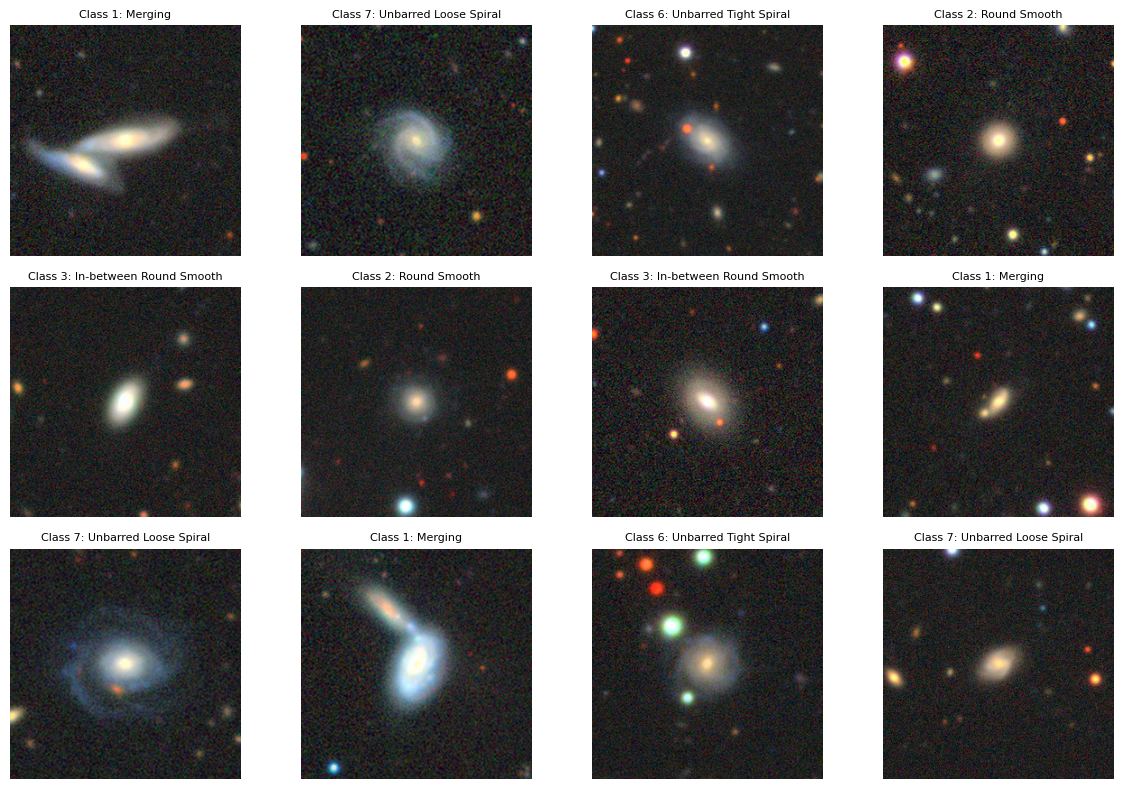

In [19]:
def display_sample_images(images, labels, num_samples=12):
    # Randomly select indices
    indices = np.random.choice(len(images), num_samples, replace=False)
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[idx].astype(np.uint8))  
        # Convert label number to description using the class_map dictionary
        plt.title(f"Class {labels[idx]}: {class_map[labels[idx]]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(images, labels)  

### Exploring Metadata

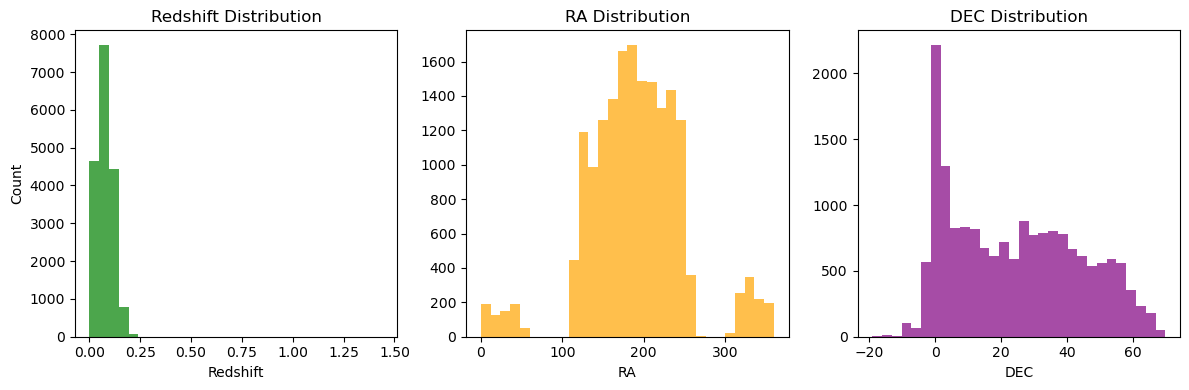

In [9]:
with h5py.File(file_path, 'r') as F:
    ra = np.array(F['ra'])
    dec = np.array(F['dec'])
    redshift = np.array(F['redshift'])
    pxscale = np.array(F['pxscale'])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(redshift, bins=30, color='green', alpha=0.7)
plt.xlabel("Redshift")
plt.ylabel("Count")
plt.title("Redshift Distribution")

plt.subplot(1, 3, 2)
plt.hist(ra, bins=30, color='orange', alpha=0.7)
plt.xlabel("RA")
plt.title("RA Distribution")

plt.subplot(1, 3, 3)
plt.hist(dec, bins=30, color='purple', alpha=0.7)
plt.xlabel("DEC")
plt.title("DEC Distribution")
plt.tight_layout()
plt.show()